In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
import pandas as pd
import numpy as np

# To add custom fonts.
import matplotlib.font_manager as fm

import math

In [2]:
#read data from fbref
def get_data (url, table_name):
    df = pd.read_html(url)[table_name]
    #team name last split of url
    team_name = url.split('/')[-1]
    df['Team'] = team_name
    #remove 'stats and the - before stats' from Team
    df['Team'] = df['Team'].str.replace('-Stats', '')
    df = df[['Round','Venue','Opponent','Result','GF', 'xG', 'GA', 'xGA', 'Team']]
    
    #keep rows with Round named Matchweek 1 to 38
    df = df[df['Round'].str.contains('Matchweek')]

    df = df.dropna()
    return df
    

In [3]:
#Function to get data
urls = ['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats', 'https://fbref.com/en/squads/dc56fe14/Milan-Stats', 'https://fbref.com/en/squads/054efa67/Bayern-Munich-Stats', 'https://fbref.com/en/squads/e2d8892c/Paris-Saint-Germain-Stats', 'https://fbref.com/en/squads/53a2f082/Real-Madrid-Stats']
#use for loop to get data from urls
dfs = []
for url in urls:
    dfs.append(get_data(url, 1))


In [4]:
dfs

[           Round Venue        Opponent Result GF   xG GA  xGA             Team
 1    Matchweek 1  Away       Tottenham      L  0  1.9  1  1.3  Manchester-City
 2    Matchweek 2  Home    Norwich City      W  5  2.7  0  0.1  Manchester-City
 3    Matchweek 3  Home         Arsenal      W  5  3.8  0  0.1  Manchester-City
 4    Matchweek 4  Away  Leicester City      W  1  2.9  0  0.8  Manchester-City
 6    Matchweek 5  Home     Southampton      D  0  1.1  0  0.4  Manchester-City
 8    Matchweek 6  Away         Chelsea      W  1  1.7  0  0.3  Manchester-City
 10   Matchweek 7  Away       Liverpool      D  2  1.2  2  1.0  Manchester-City
 11   Matchweek 8  Home         Burnley      W  2  1.9  0  1.0  Manchester-City
 13   Matchweek 9  Away        Brighton      W  4  3.9  1  1.3  Manchester-City
 15  Matchweek 10  Home  Crystal Palace      L  0  1.1  2  1.1  Manchester-City
 17  Matchweek 11  Away  Manchester Utd      W  2  2.0  0  0.6  Manchester-City
 18  Matchweek 12  Home         Everton 

In [5]:
#to a dataframe
df = pd.concat(dfs)


In [6]:
#split Round 
df['Round'] = df['Round'].str.split(' ').str[1]
df.to_excel('data.xlsx')

In [7]:
#get all the xG values and xGA values and put them in a list
xG_all = df['xG'].tolist()
xGA_all = df['xGA'].tolist()

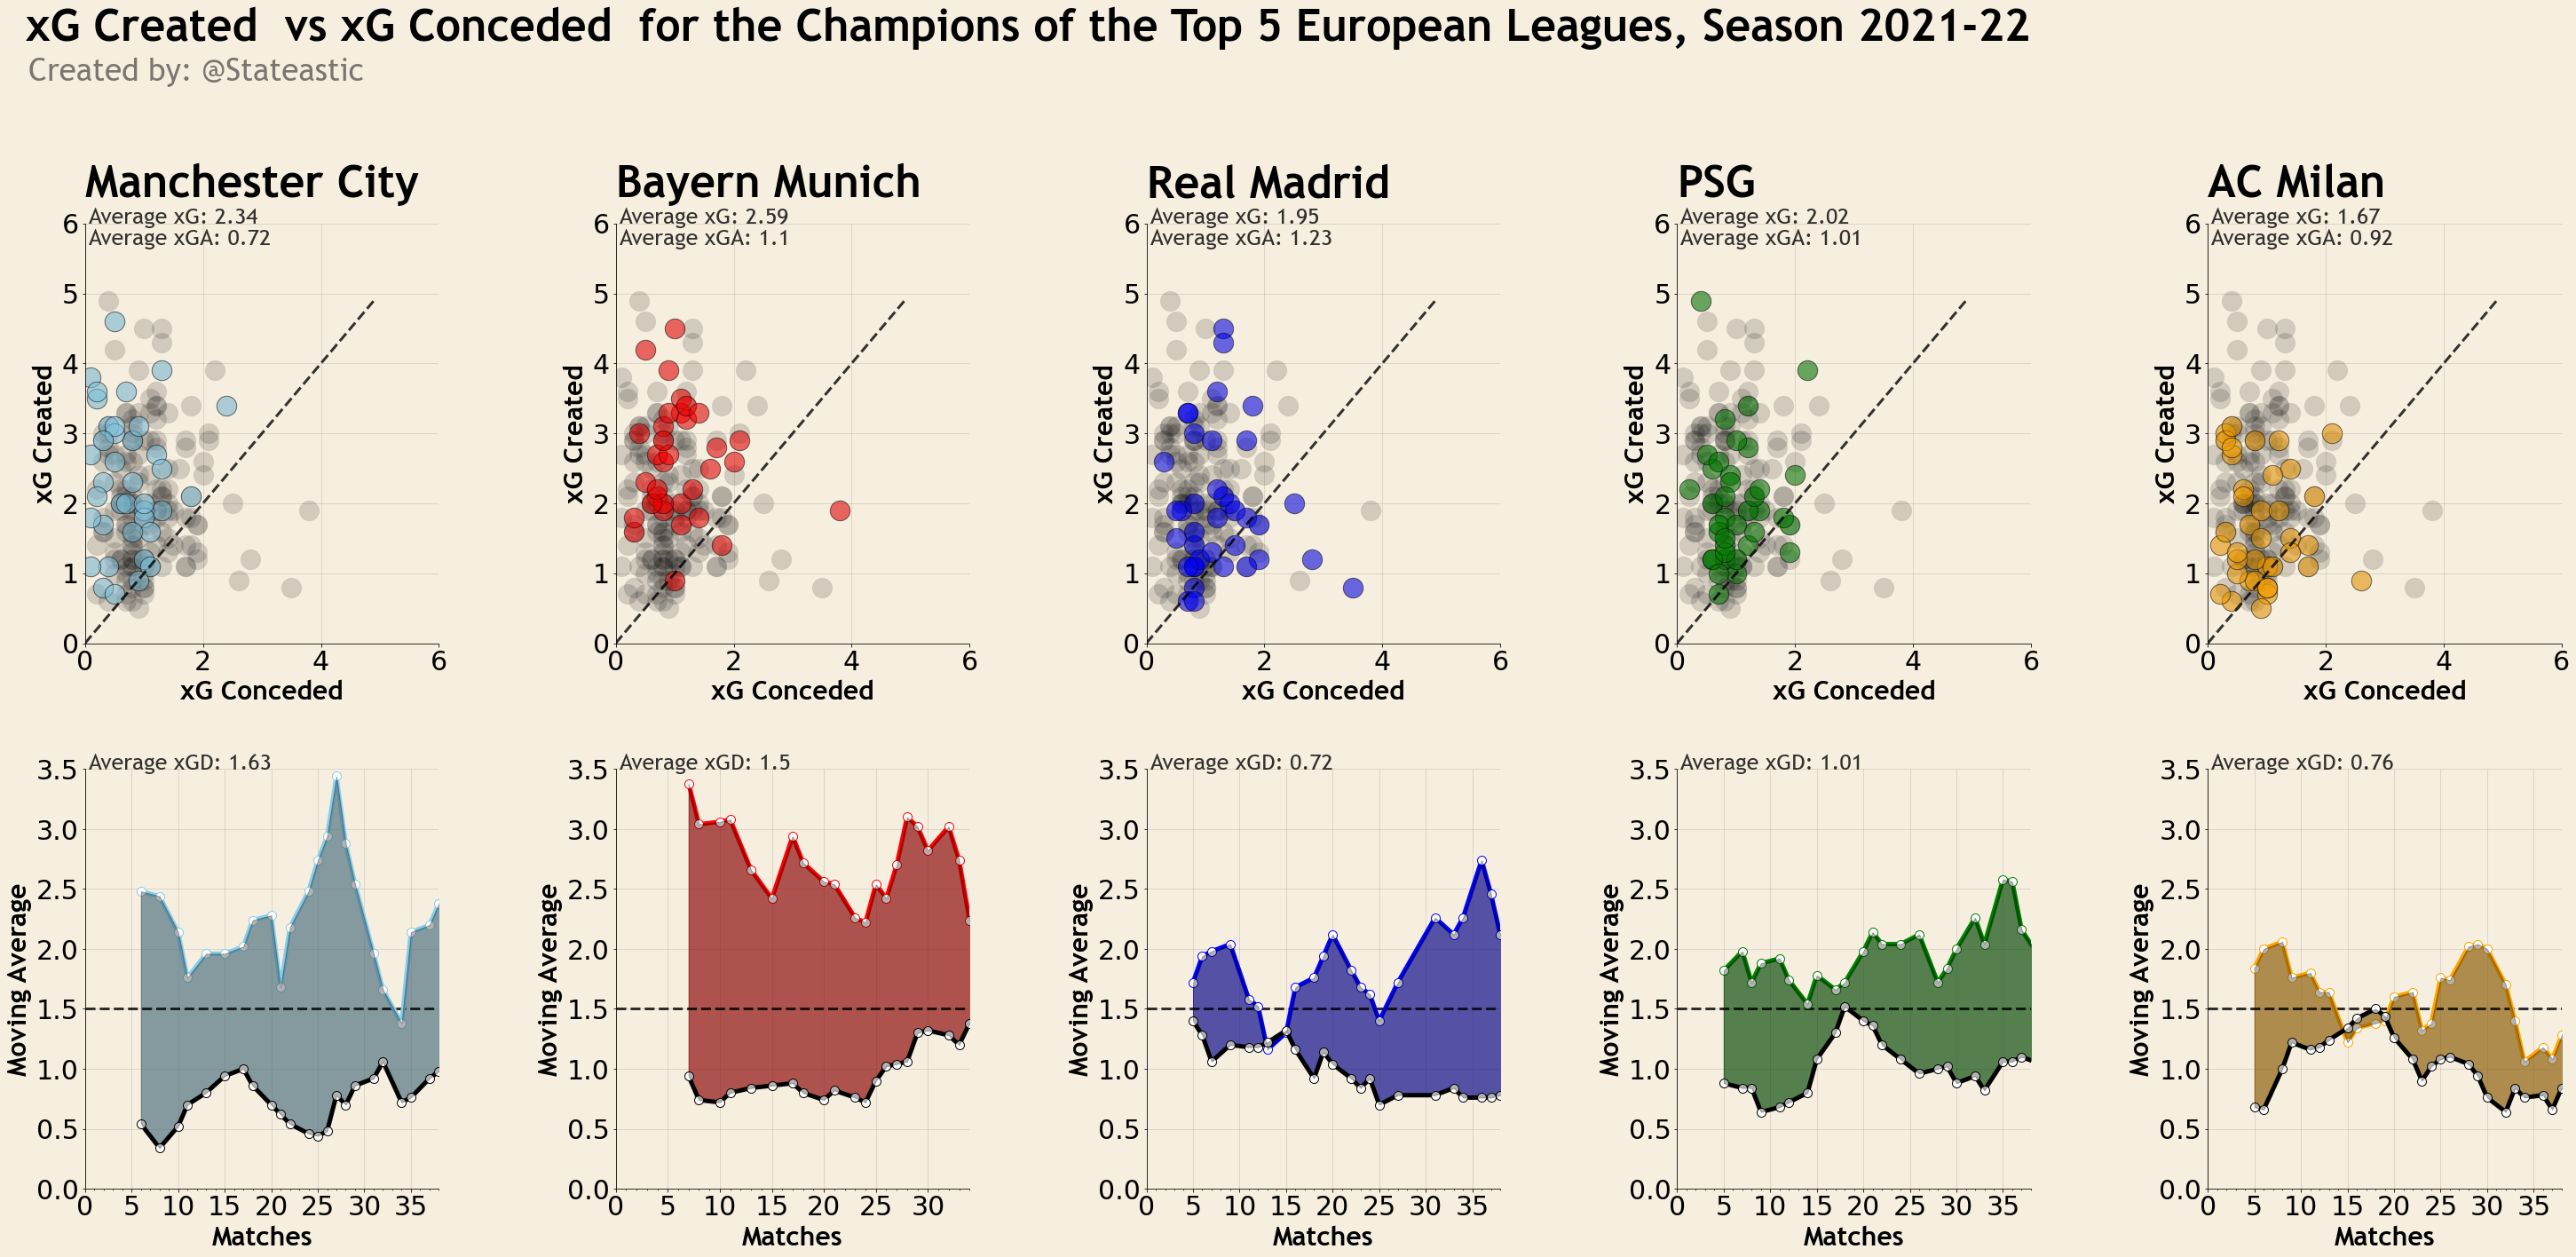

In [8]:
#create a scatter plot for xG vs xGA for each team with Venue[Home] in red and Venue[Away] in blue
fig = plt.figure(figsize=(50,20))

facecolor = '#f6eedf'
fig.patch.set_facecolor(facecolor)


#columns to be equally distributed
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1], height_ratios=[0.5, 0.5], wspace=0.5, hspace=0.3)



#ax1 first row first column
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[0, 3])
ax5 = plt.subplot(gs[0, 4])
ax6 = plt.subplot(gs[1, 0])
ax7 = plt.subplot(gs[1, 1])
ax8 = plt.subplot(gs[1, 2])
ax9 = plt.subplot(gs[1, 3])
ax10 = plt.subplot(gs[1, 4])


#remove spines from all subplots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#set facecolor of all subplots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    ax.patch.set_facecolor(facecolor)

#set grid on all subplots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    ax.grid(True, zorder = 0, color = 'black', linestyle = '-', linewidth = 0.5, alpha = 0.2)

#set xlim and ylim for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

#xticks and yticks for all subplots size
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=20)

#set xlabel and ylabel for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlabel('xG Conceded', fontsize=30, fontweight='bold', fontname='Trebuchet MS', labelpad=5)
    ax.set_ylabel('xG Created', fontsize=30, fontweight='bold', fontname='Trebuchet MS', labelpad=5)

#dashed line for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.plot([0, max(xG_all)], [0, max(xG_all)], color='black', linestyle='--', linewidth=3, alpha=0.8, zorder = 2)

#horizontal line at 1.5 Average for all subplots
for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.axhline(y=1.5, color='black', linestyle='--', linewidth=3, alpha=0.8, zorder = 2)

#set xlim for ax6 ax7 ax8 ax9 and ax10
for ax in [ax6, ax8, ax9, ax10]:
    ax.set_xlim(0, 38)

for ax in [ax7]:
    ax.set_xlim(0, 34)

for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.set_ylim(0, 3.5, 0.5)


#set xticks in multiple of 5
for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#set ticks size
for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=20)

#set xlabel and ylabel for all subplots
for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.set_xlabel('Matches', fontsize=30, fontweight='bold', fontname='Trebuchet MS', labelpad=5)
    ax.set_ylabel('Moving Average', fontsize=30, fontweight='bold', fontname='Trebuchet MS', labelpad=5)

#find the average xG and xGA for each team and xGD 
df['xG_avg'] = df.groupby('Team')['xG'].transform('mean')
df['xGA_avg'] = df.groupby('Team')['xGA'].transform('mean')
df['xGD'] = df['xG_avg'] - df['xGA_avg']

#Team 1

ax1.scatter(df[df['Team'] == 'Manchester-City']['xGA'], df[df['Team'] == 'Manchester-City']['xG'], color='skyblue', alpha=0.5, s=500, edgecolor = 'black', zorder = 2)
ax1.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=500, edgecolor = 'grey', zorder = 1)

#annotate average xg and xga value of team 1
ax1.annotate('Average xG: ' + str(round(df[df['Team'] == 'Manchester-City']['xG'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax1.annotate('Average xGA: ' + str(round(df[df['Team'] == 'Manchester-City']['xGA'].mean(), 2)), xy=(0.01, 0.95), xycoords='axes fraction', fontsize=25,  fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax1.set_title('Manchester City', fontsize=50, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

ax6.plot(df[df['Team'] == 'Manchester-City']['xG'].rolling(window=5).mean(), color='skyblue', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax6.plot(df[df['Team'] == 'Manchester-City']['xGA'].rolling(window=5).mean(), color='black', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax6.fill_between(df[df['Team'] == 'Manchester-City']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Manchester-City']['xG'].rolling(window=5).mean(), df[df['Team'] == 'Manchester-City']['xGA'].rolling(window=5).mean(), color='skyblue', alpha=0.5, zorder = 2)
ax6.fill_between(df[df['Team'] == 'Manchester-City']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Manchester-City']['xGA'].rolling(window=5).mean(), df[df['Team'] == 'Manchester-City']['xG'].rolling(window=5).mean(), color='black', alpha=0.3, zorder = 3)
ax6.annotate('Average xGD: ' + str(round(df[df['Team'] == 'Manchester-City']['xGD'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)



#Team 2
ax2.scatter(df[df['Team'] == 'Bayern-Munich']['xGA'], df[df['Team'] == 'Bayern-Munich']['xG'], color='red', alpha=0.5, s=500, edgecolor = 'black', zorder = 2)
ax2.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=500, edgecolor = 'grey', zorder = 1)
ax2.annotate('Average xG: ' + str(round(df[df['Team'] == 'Bayern-Munich']['xG'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax2.annotate('Average xGA: ' + str(round(df[df['Team'] == 'Bayern-Munich']['xGA'].mean(), 2)), xy=(0.01, 0.95), xycoords='axes fraction', fontsize=25,  fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax2.set_title('Bayern Munich', fontsize=50, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

ax7.plot(df[df['Team'] == 'Bayern-Munich']['xG'].rolling(window=5).mean(), color='red', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax7.plot(df[df['Team'] == 'Bayern-Munich']['xGA'].rolling(window=5).mean(), color='black', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax7.fill_between(df[df['Team'] == 'Bayern-Munich']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Bayern-Munich']['xG'].rolling(window=5).mean(), df[df['Team'] == 'Bayern-Munich']['xGA'].rolling(window=5).mean(), color='red', alpha=0.5, zorder = 2)
ax7.fill_between(df[df['Team'] == 'Bayern-Munich']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Bayern-Munich']['xGA'].rolling(window=5).mean(), df[df['Team'] == 'Bayern-Munich']['xG'].rolling(window=5).mean(), color='black', alpha=0.3, zorder = 3)
ax7.annotate('Average xGD: ' + str(round(df[df['Team'] == 'Bayern-Munich']['xGD'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)





#Team 3
ax3.scatter(df[df['Team'] == 'Real-Madrid']['xGA'], df[df['Team'] == 'Real-Madrid']['xG'], color='blue', alpha=0.5, s=500, edgecolor = 'black', zorder = 2)
ax3.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=500, edgecolor = 'grey', zorder = 1)
ax3.annotate('Average xG: ' + str(round(df[df['Team'] == 'Real-Madrid']['xG'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax3.annotate('Average xGA: ' + str(round(df[df['Team'] == 'Real-Madrid']['xGA'].mean(), 2)), xy=(0.01, 0.95), xycoords='axes fraction', fontsize=25,  fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax3.set_title('Real Madrid', fontsize=50, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

ax8.plot(df[df['Team'] == 'Real-Madrid']['xG'].rolling(window=5).mean(), color='blue', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax8.plot(df[df['Team'] == 'Real-Madrid']['xGA'].rolling(window=5).mean(), color='black', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax8.fill_between(df[df['Team'] == 'Real-Madrid']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Real-Madrid']['xG'].rolling(window=5).mean(), df[df['Team'] == 'Real-Madrid']['xGA'].rolling(window=5).mean(), color='blue', alpha=0.5, zorder = 2)
ax8.fill_between(df[df['Team'] == 'Real-Madrid']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Real-Madrid']['xGA'].rolling(window=5).mean(), df[df['Team'] == 'Real-Madrid']['xG'].rolling(window=5).mean(), color='black', alpha=0.3, zorder = 3)
ax8.annotate('Average xGD: ' + str(round(df[df['Team'] == 'Real-Madrid']['xGD'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)


#Team 4
ax4.scatter(df[df['Team'] == 'Paris-Saint-Germain']['xGA'], df[df['Team'] == 'Paris-Saint-Germain']['xG'], color='green', alpha=0.5, s=500, edgecolor = 'black', zorder = 2)
ax4.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=500, edgecolor = 'grey', zorder = 1)
ax4.annotate('Average xG: ' + str(round(df[df['Team'] == 'Paris-Saint-Germain']['xG'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax4.annotate('Average xGA: ' + str(round(df[df['Team'] == 'Paris-Saint-Germain']['xGA'].mean(), 2)), xy=(0.01, 0.95), xycoords='axes fraction', fontsize=25,  fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax4.set_title('PSG', fontsize=50, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

ax9.plot(df[df['Team'] == 'Paris-Saint-Germain']['xG'].rolling(window=5).mean(), color='green', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax9.plot(df[df['Team'] == 'Paris-Saint-Germain']['xGA'].rolling(window=5).mean(), color='black', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax9.fill_between(df[df['Team'] == 'Paris-Saint-Germain']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Paris-Saint-Germain']['xG'].rolling(window=5).mean(), df[df['Team'] == 'Paris-Saint-Germain']['xGA'].rolling(window=5).mean(), color='green', alpha=0.5, zorder = 2)
ax9.fill_between(df[df['Team'] == 'Paris-Saint-Germain']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Paris-Saint-Germain']['xGA'].rolling(window=5).mean(), df[df['Team'] == 'Paris-Saint-Germain']['xG'].rolling(window=5).mean(), color='black', alpha=0.3, zorder = 3)
ax9.annotate('Average xGD: ' + str(round(df[df['Team'] == 'Paris-Saint-Germain']['xGD'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)



#Team 5
ax5.scatter(df[df['Team'] == 'Milan']['xGA'], df[df['Team'] == 'Milan']['xG'], color='orange', alpha=0.5, s=500, edgecolor = 'black', zorder = 2)
ax5.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=500, edgecolor = 'grey', zorder = 1)
ax5.annotate('Average xG: ' + str(round(df[df['Team'] == 'Milan']['xG'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax5.annotate('Average xGA: ' + str(round(df[df['Team'] == 'Milan']['xGA'].mean(), 2)), xy=(0.01, 0.95), xycoords='axes fraction', fontsize=25,  fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)
ax5.set_title('AC Milan', fontsize=50, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

ax10.plot(df[df['Team'] == 'Milan']['xG'].rolling(window=5).mean(), color='orange', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax10.plot(df[df['Team'] == 'Milan']['xGA'].rolling(window=5).mean(), color='black', linewidth=5, zorder = 2, mfc = 'white', marker = 'o', markersize = 10)
ax10.fill_between(df[df['Team'] == 'Milan']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Milan']['xG'].rolling(window=5).mean(), df[df['Team'] == 'Milan']['xGA'].rolling(window=5).mean(), color='orange', alpha=0.5, zorder = 2)
ax10.fill_between(df[df['Team'] == 'Milan']['xG'].rolling(window=5).mean().index, df[df['Team'] == 'Milan']['xGA'].rolling(window=5).mean(), df[df['Team'] == 'Milan']['xG'].rolling(window=5).mean(), color='black', alpha=0.3, zorder = 3)
ax10.annotate('Average xGD: ' + str(round(df[df['Team'] == 'Milan']['xGD'].mean(), 2)), xy=(0.01, 1), xycoords='axes fraction', fontsize=25, fontname='Trebuchet MS', color='black', zorder = 3, alpha=0.8)




#plot title
plt.suptitle('xG Created  vs xG Conceded  for the Champions of the Top 5 European Leagues, Season 2021-22', fontsize=50, fontweight='bold', fontname='Trebuchet MS', y = 1.05, x = 0.42)

#subplot title
plt.text(0.315, 1.36, 'Created by: @Stateastic', fontsize=35, fontname='Trebuchet MS', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, color='black', alpha=0.5)

#save figure
fig.savefig('European Leagues1.png', dpi=600, bbox_inches='tight', facecolor=facecolor)
